In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
listin   = pd.read_csv('listings.csv')

In [117]:
listin.shape

(37765, 75)

In [118]:
listin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37765 entries, 0 to 37764
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            37765 non-null  int64  
 1   listing_url                                   37765 non-null  object 
 2   scrape_id                                     37765 non-null  int64  
 3   last_scraped                                  37765 non-null  object 
 4   source                                        37765 non-null  object 
 5   name                                          37763 non-null  object 
 6   description                                   36675 non-null  object 
 7   neighborhood_overview                         21296 non-null  object 
 8   picture_url                                   37764 non-null  object 
 9   host_id                                       37765 non-null 

In [119]:

listin['calendar_last_scraped'] = pd.to_datetime(listin['calendar_last_scraped']).dt.date

Validamos que los registros de actualizacion de los alquileres por parte de los propietaros esten los mas actualizado posible

In [120]:
listin['calendar_last_scraped'].max()

datetime.date(2024, 7, 6)

In [121]:
listin['calendar_last_scraped'].min()

datetime.date(2024, 7, 5)

#### 1. Analisamos el precio de arriendo por inmueble se le ajustara el formato y se le eliminaran precios que este por fuera de los percentiles ####

In [122]:
listin['price'] = listin['price'].replace({r'\$':''}, regex=True).replace({r'\,':''}, regex=True)
listin['price'] = pd.to_numeric(listin['price'])

In [123]:
listin['price'].describe()

,price
count,23044.000000
mean,221.074900
std,766.620992
min,8.000000
25%,86.000000
50%,150.000000
75%,250.000000
max,100000.000000


[]

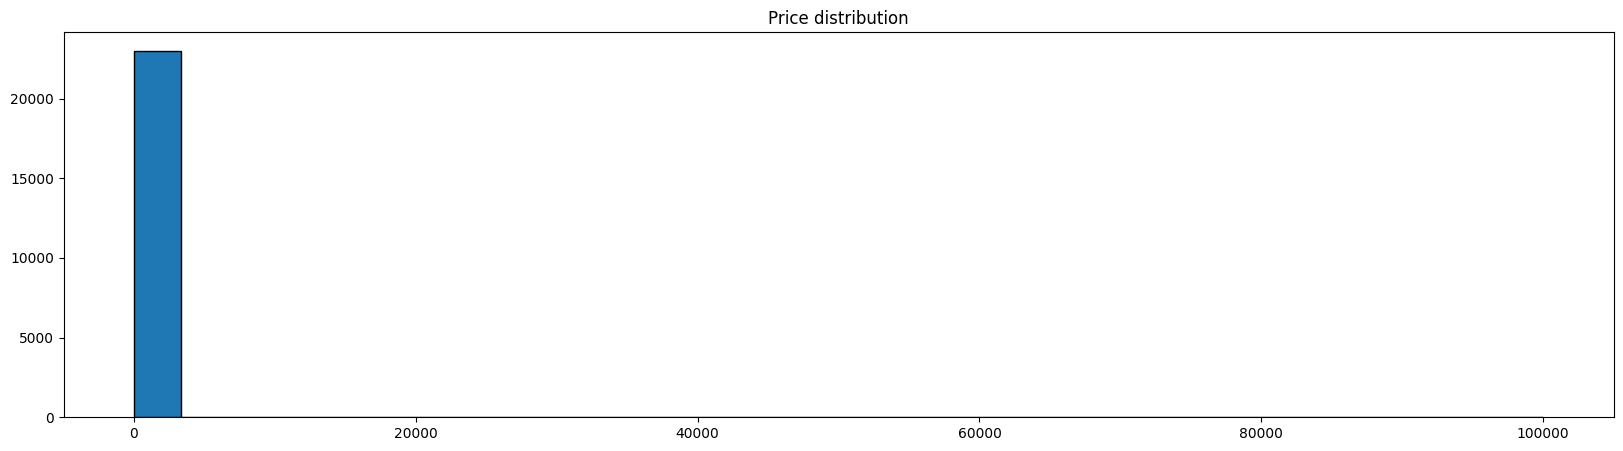

In [124]:
plt.figure(figsize=(20, 5))
plt.hist(listin['price'], bins=30, edgecolor='black')
plt.title("Price distribution")
plt.plot()

Se calculan los percentiles del precio y  se eliminan los registros que estan por fuera del rango para quitar lo rangos que esten por fuera

In [125]:
#### eliminar por fuera de cuartiles
Q1 = listin['price'].quantile(0.25)
Q3 = listin['price'].quantile(0.93)
print(Q1,Q3)
IQR = Q3 - Q1
print(IQR)
limites_inf = Q1 - 1.5 * IQR
limites_sup = Q3 + 1.5 * IQR
print(limites_inf,limites_sup)
listin = listin[(listin['price'] >= limites_inf) & (listin['price'] <= limites_sup)]

86.0 465.0
379.0
-482.5 1033.5


In [126]:
listin['price'].describe()

,price
count,22753.000000
mean,190.588406
std,155.784440
min,8.000000
25%,85.000000
50%,148.000000
75%,249.000000
max,1033.000000


[]

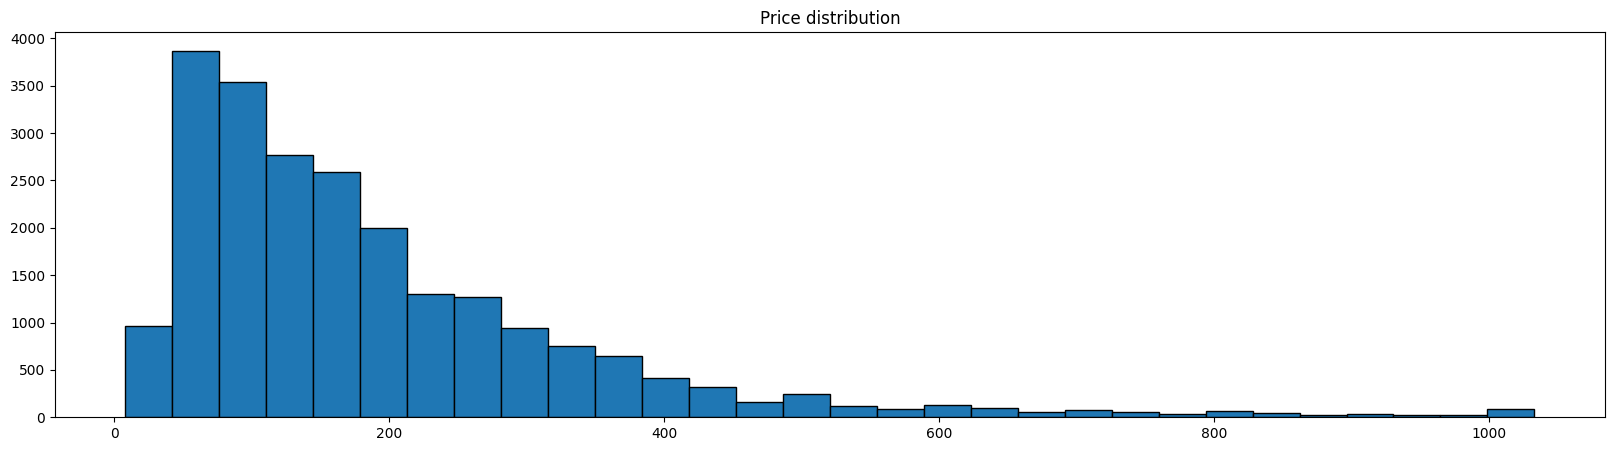

In [127]:
plt.figure(figsize=(20, 5))
plt.hist(listin['price'], bins=30, edgecolor='black')
plt.title("Price distribution")
plt.plot()

#### 2.Analisamos el tipo de habitacion, ya quer consideramos que puede ser un distintivo a la hora de tomar la decision de arriendo

In [128]:
frecuencias = listin['room_type'].value_counts()
print(frecuencias)

room_type
Entire home/apt    12508
Private room        9647
Shared room          333
Hotel room           265
Name: count, dtype: int64


In [129]:
porcentajes = listin['room_type'].value_counts(normalize=True) * 100
print(porcentajes)

room_type
Entire home/apt    54.972971
Private room       42.398805
Shared room         1.463543
Hotel room          1.164682
Name: proportion, dtype: float64


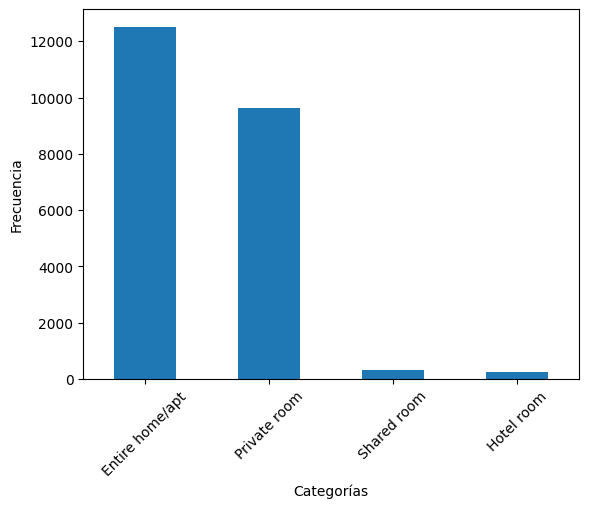

In [130]:
listin['room_type'].value_counts().plot(kind='bar')
plt.xlabel('Categorías')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

#### 3. Analisamos el numero de reseñas que tiene cada uno de los apartamentos para validar si esto influye en las personas al momento de reservar.


In [131]:

listin['number_of_reviews'].describe()

,number_of_reviews
count,22753.000000
mean,32.966114
std,69.918329
min,0.000000
25%,0.000000
50%,6.000000
75%,34.000000
max,1915.000000


[]

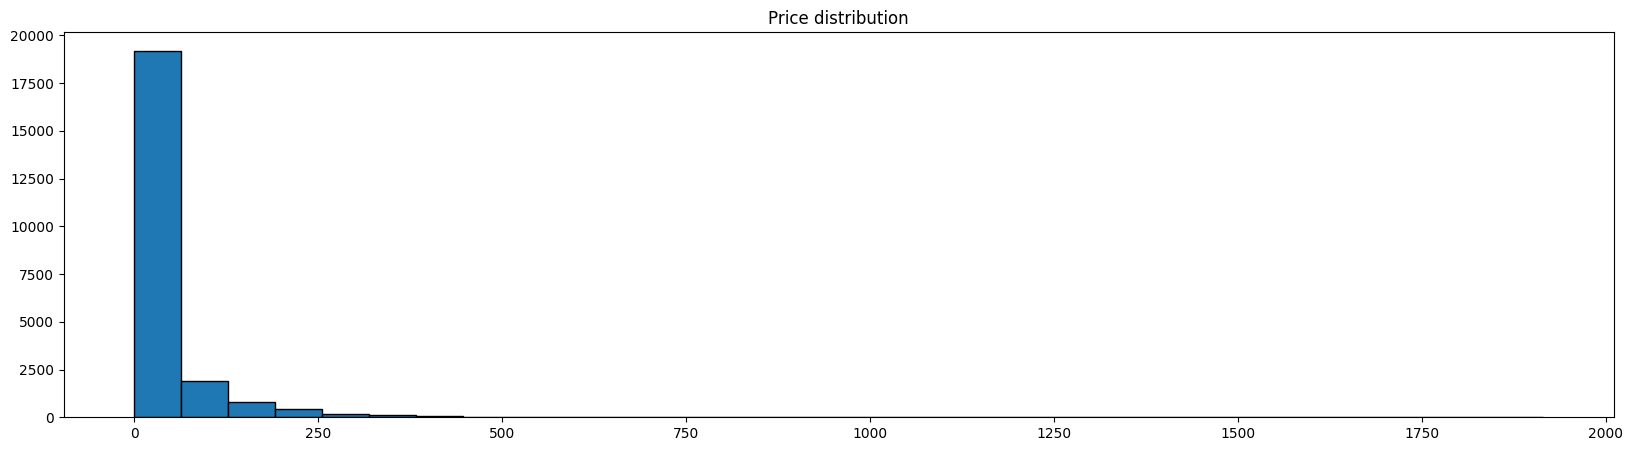

In [132]:
plt.figure(figsize=(20, 5))
plt.hist(listin['number_of_reviews'], bins=30, edgecolor='black')
plt.title("Price distribution")
plt.plot()

In [133]:
Q1 = listin['number_of_reviews'].quantile(0.25)
Q3 = listin['number_of_reviews'].quantile(0.90)
print(Q1,Q3)
IQR = Q3 - Q1
print(IQR)
limites_inf = Q1 - 1.5 * IQR
limites_sup = Q3 + 1.5 * IQR
print(limites_inf,limites_sup)


0.0 98.0
98.0
-147.0 245.0


###4.se analizara el sector de la ciudad para ver en que partes de la ciudad se generan mayores alquileres a un mejor precio

In [134]:
frecuencias = listin['neighbourhood_group_cleansed'].value_counts()
print(frecuencias)

neighbourhood_group_cleansed
Manhattan        9761
Brooklyn         7967
Queens           3843
Bronx             868
Staten Island     314
Name: count, dtype: int64


In [135]:
porcentajes = listin['neighbourhood_group_cleansed'].value_counts(normalize=True) * 100
print(porcentajes)

neighbourhood_group_cleansed
Manhattan        42.899837
Brooklyn         35.015163
Queens           16.890080
Bronx             3.814882
Staten Island     1.380038
Name: proportion, dtype: float64


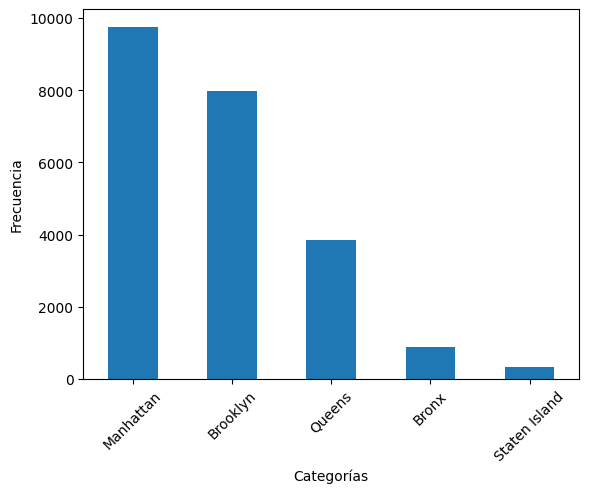

In [136]:
listin['neighbourhood_group_cleansed'].value_counts().plot(kind='bar')
plt.xlabel('Categorías')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

5. Analizara el minimo de dias para reserva, con el fin de validar si esto afecta a la cantidad de reservas

In [137]:
listin['minimum_nights'].describe()

,minimum_nights
count,22753.000000
mean,27.027733
std,22.189524
min,1.000000
25%,30.000000
50%,30.000000
75%,30.000000
max,500.000000


[]

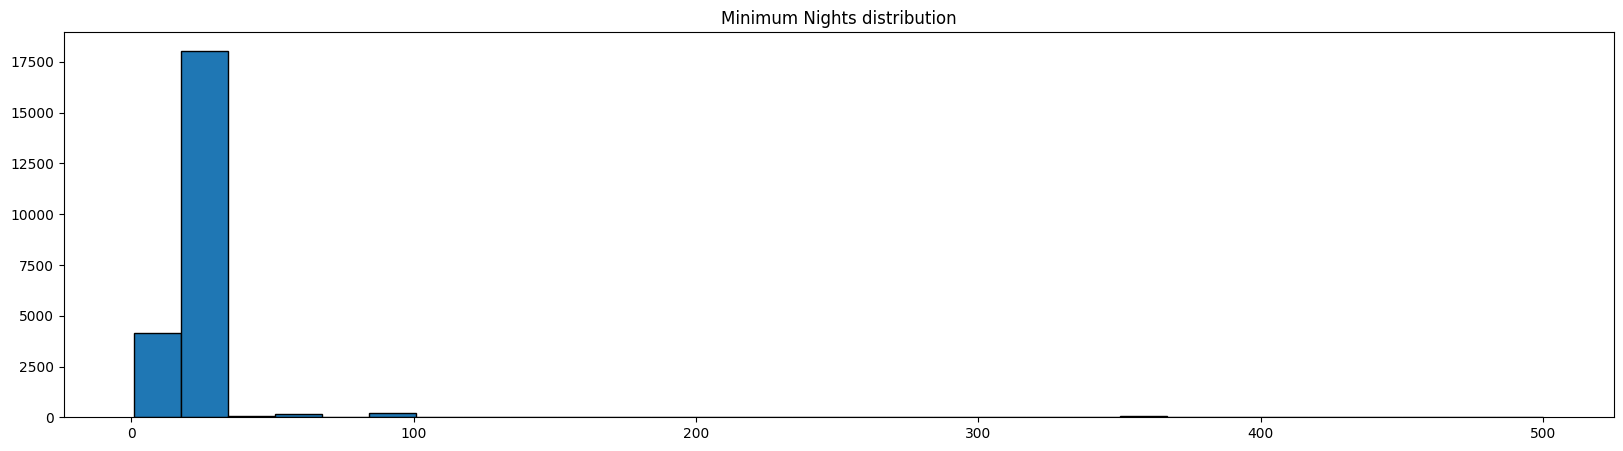

In [138]:
plt.figure(figsize=(20, 5))
plt.hist(listin['minimum_nights'], bins=30, edgecolor='black')
plt.title("Minimum Nights distribution")
plt.plot()

In [139]:
Q1 = listin['minimum_nights'].quantile(0.15)
Q3 = listin['minimum_nights'].quantile(0.95)
print(Q1,Q3)
IQR = Q3 - Q1
print(IQR)
limites_inf = Q1 - 1.5 * IQR
limites_sup = Q3 + 1.5 * IQR
print(limites_inf,limites_sup)
listin = listin[(listin['minimum_nights'] >= limites_inf) & (listin['minimum_nights'] <= limites_sup)]

3.0 31.0
28.0
-39.0 73.0


[]

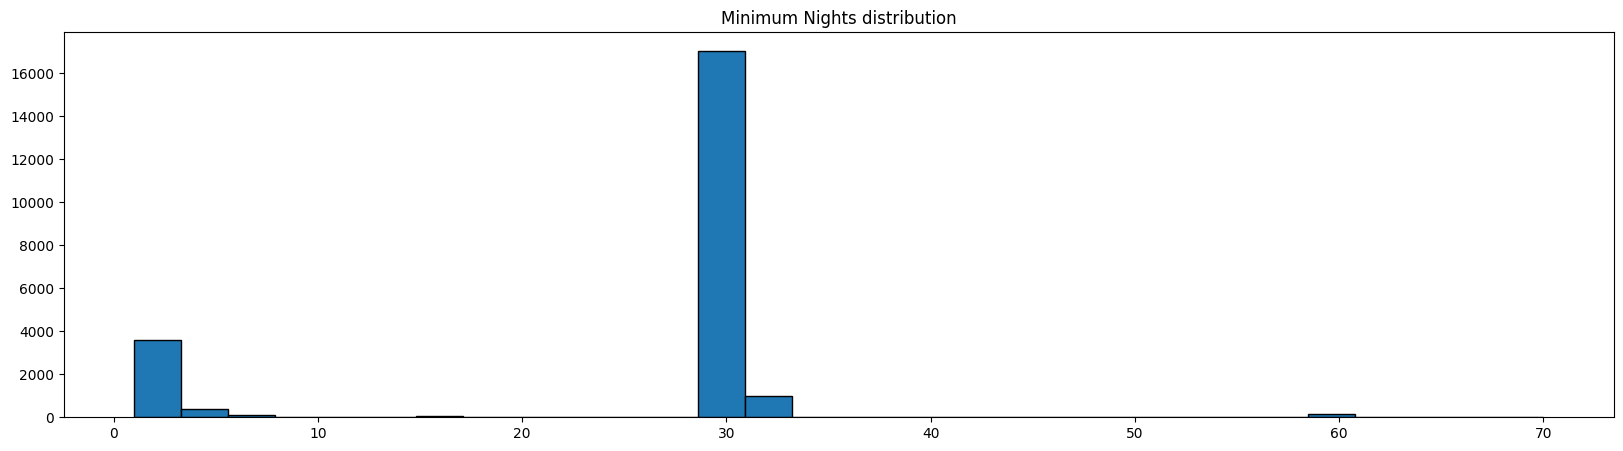

In [140]:
plt.figure(figsize=(20, 5))
plt.hist(listin['minimum_nights'], bins=30, edgecolor='black')
plt.title("Minimum Nights distribution")
plt.plot()

In [141]:
listin.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
1,5136,https://www.airbnb.com/rooms/5136,20240705150938,2024-07-05,city scrape,Spacious Family Friendly Duplex w/ Patio + Yard,"We welcome you to stay in our lovely 2 br, 130...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,7378,https://www.airbnb.com/users/show/7378,Rebecca,2009-02-03,"New York, NY","Rebecca is an artist/designer, and Henoch is i...",within an hour,100%,100%,f,https://a0.muscache.com/im/users/7378/profile_...,https://a0.muscache.com/im/users/7378/profile_...,Greenwood Heights,1.0,5.0,"['email', 'phone']",t,t,NaN,Sunset Park,Brooklyn,40.66265,-73.99454,Entire rental unit,Entire home/apt,4,1.5,1.5 baths,2.0,2.0,"[""Smoke alarm"", ""Heating"", ""Dryer"", ""Bed linen...",215.0,30,730,30.0,30.0,730.0,730.0,30.0,730.0,NaN,t,2,11,11,71,2024-07-05,4,1,0,2014-01-02,2023-08-20,4.75,4.75,4.50,5.00,5.00,4.75,4.75,NaN,t,1,1,0,0,0.03
2,6848,https://www.airbnb.com/rooms/6848,20240705150938,2024-07-06,city scrape,Only 2 stops to Manhattan studio,Comfortable studio apartment with super comfor...,NaN,https://a0.muscache.com/pictures/e4f031a7-f146...,15991,https://www.airbnb.com/users/show/15991,Allen & Irina,2009-05-06,"New York, NY",We love to travel. When we travel we like to s...,within an hour,100%,100%,t,https://a0.muscache.com/im/users/15991/profile...,https://a0.muscache.com/im/users/15991/profile...,Williamsburg,1.0,1.0,"['email', 'phone']",t,t,NaN,Williamsburg,Brooklyn,40.70935,-73.95342,Entire rental unit,Entire home/apt,3,1.0,1 bath,2.0,1.0,"[""Smoke alarm"", ""Heating"", ""Bed linens"", ""Oven...",81.0,30,730,30.0,30.0,1125.0,1125.0,30.0,1125.0,NaN,t,0,5,5,193,2024-07-06,193,3,0,2009-05-25,2024-05-18,4.58,4.59,4.86,4.85,4.80,4.68,4.57,NaN,f,1,1,0,0,1.05
3,6872,https://www.airbnb.com/rooms/6872,20240705150938,2024-07-05,city scrape,Uptown Sanctuary w/ Private Bath (Month to Month),A charming month-to-month home away from home ...,This sweet Harlem sanctuary is a 10-20 minute ...,https://a0.muscache.com/pictures/miso/Hosting-...,16104,https://www.airbnb.com/users/show/16104,Kae,2009-05-07,"New York, NY",A former life in fashion and wellness has left...,within a day,50%,0%,f,https://a0.muscache.com/im/pictures/user/d865a...,https://a0.muscache.com/im/pictures/user/d865a...,East Harlem,2.0,2.0,"['email', 'phone', 'work_email']",t,t,Neighborhood highlights,East Harlem,Manhattan,40.80107,-73.94255,Private room in condo,Private room,1,1.0,1 shared bath,1.0,1.0,"[""Smoke alarm"", ""Fire extinguisher"", ""Heating""...",65.0,30,180,30.0,30.0,180.0,180.0,30.0,180.0,NaN,t,30,60,90,365,2024-07-05,1,0,0,2022-06-05,2022-06-05,5.00,5.00,5.00,5.00,5.00,5.00,5.00,NaN,f,2,0,2,0,0.04
4,6990,https://www.airbnb.com/rooms/6990,20

In [142]:
listin.to_csv('Listing_clean.csv', index=False,sep=',')